In [18]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Set pd to show all columns
pd.set_option('display.max_columns', None)

# Try PLS regression on puzzler/non-puzzler

In [198]:
data = pd.read_csv('HR_data.csv', index_col=0)
#Remove rows with missing values
data = data.dropna()

puzzler = data[data['Puzzler'] == 1]
non_puzzler = data[data['Puzzler'] == 0]

biometrics = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT']

emotions = ['Frustrated', 'upset', 'hostile', 'alert',
       'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active',
       'determined']

neg_emotions = ['Frustrated', 'upset', 'hostile', 'ashamed', 'nervous', 'afraid']
pos_emotions = ['alert', 'inspired', 'attentive', 'active', 'determined']

categories = ['Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']

X_puzzler = puzzler[biometrics]
#y_puzzler sum of positive emotions and sum of negative emotions
y_puzzler = puzzler[emotions]
y_puzzler['Neg_emotions'] = y_puzzler[neg_emotions].sum(axis=1)
y_puzzler['Pos_emotions'] = y_puzzler[pos_emotions].sum(axis=1)


X_non_puzzler = non_puzzler[biometrics]
y_non_puzzler = non_puzzler[emotions]
y_non_puzzler['Neg_emotions'] = y_non_puzzler[neg_emotions].sum(axis=1)
y_non_puzzler['Pos_emotions'] = y_non_puzzler[pos_emotions].sum(axis=1)


C:\Users\johau\AppData\Local\Temp\ipykernel_18676\1366002177.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_puzzler['Neg_emotions'] = y_puzzler[neg_emotions].sum(axis=1)
C:\Users\johau\AppData\Local\Temp\ipykernel_18676\1366002177.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_puzzler['Pos_emotions'] = y_puzzler[pos_emotions].sum(axis=1)
C:\Users\johau\AppData\Local\Temp\ipykernel_18676\1366002177.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

# Try PLS regression

##### OBS: Jeg tror umiddelbart ikke at jeg bruger det rigtigt... Når kun 1 component bliver valgt vha cross validation.

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_components': 1}
(2, 51)


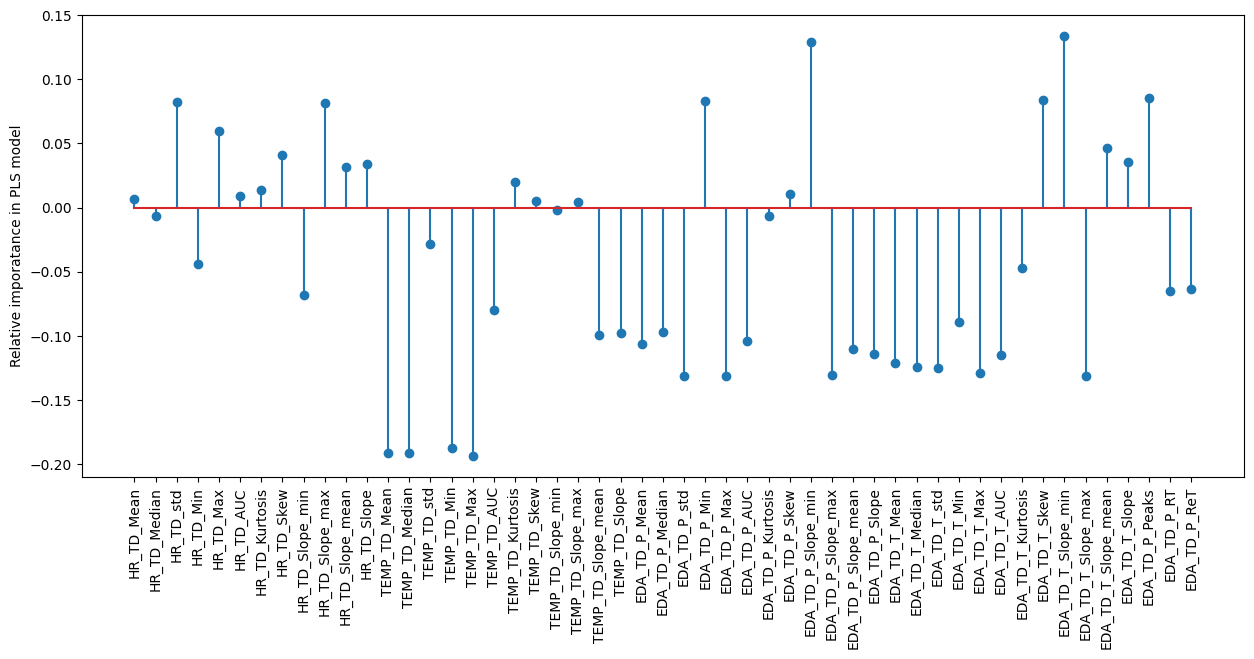

In [137]:
# Define PLS object
pls = PLSRegression()

#normalize data OBS: Måske ikke nødvendigt
X_puzzler = (X_puzzler - X_puzzler.mean()) / X_puzzler.std()
#y_puzzler = (y_puzzler - y_puzzler.mean()) / y_puzzler.std()

# parameters for cross-validation
n_comps = range(1, 21)

# Set up GridSearchCV
param_grid = {'n_components': n_comps}
grid = GridSearchCV(pls, param_grid, cv=10, n_jobs=-1, verbose=1, scoring=['neg_mean_squared_error', 'explained_variance'], refit='explained_variance')

# Fit the grid search model
search = grid.fit(X_puzzler, y_puzzler[['Pos_emotions', 'Neg_emotions']])
print(search.best_params_)

coef =grid.best_estimator_.coef_

print(coef.shape)

# A stem plot can be used to plot the betas
# plot the loadings - in order to compare these the variables should be
# normalized or at least on a comparable scale.
coef = coef[0]/np.std(X_puzzler, axis=0)
plt.figure(figsize=(15, 6))

#set xticks to be the names of the variables
plt.xticks(range(1,52), X_puzzler.columns, rotation=90)
plt.ylabel('Relative imporatance in PLS model')
plt.stem(range(1,52), coef.squeeze())
plt.show()

# CCA

##### Spørg TA's eller Line om fortolkning af disse plots og hvad loading er her ift. PCA - Det har et eller andet med correlationen mellem biometrics og emotions at gøre, men hvordan det skal fortolkes er jeg i tvivl om

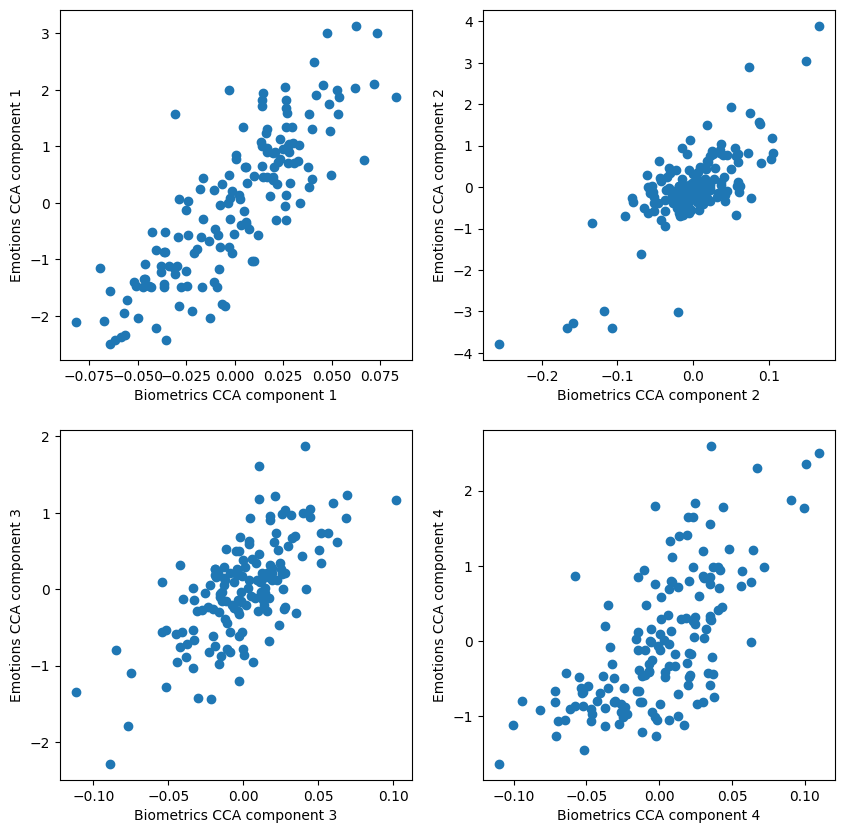

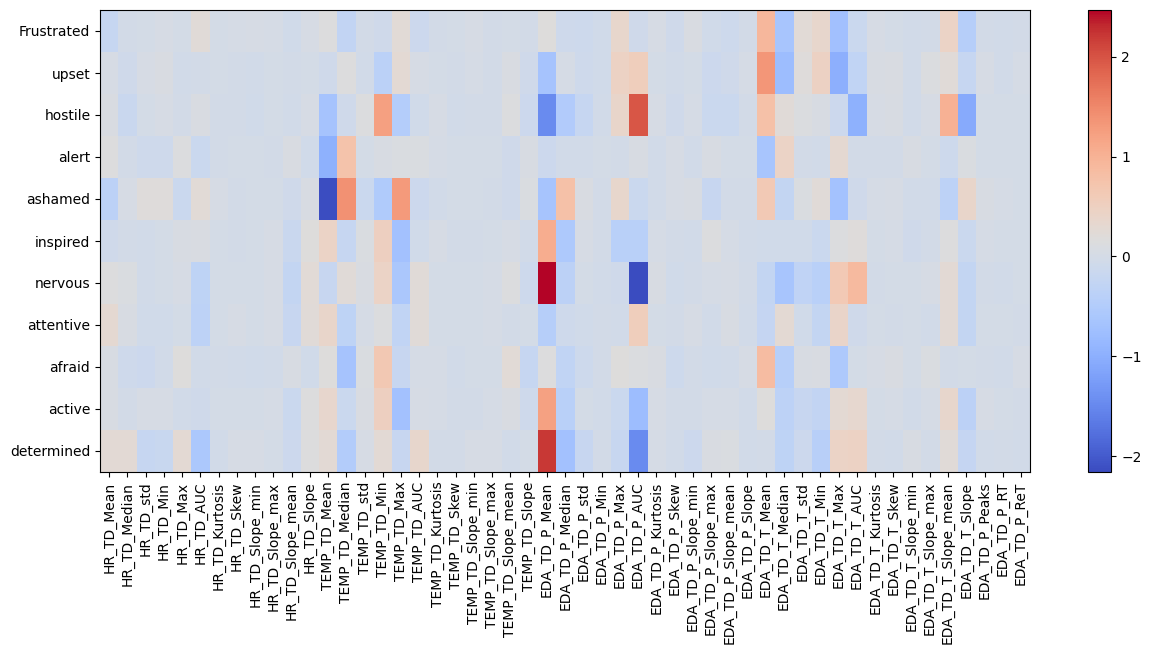

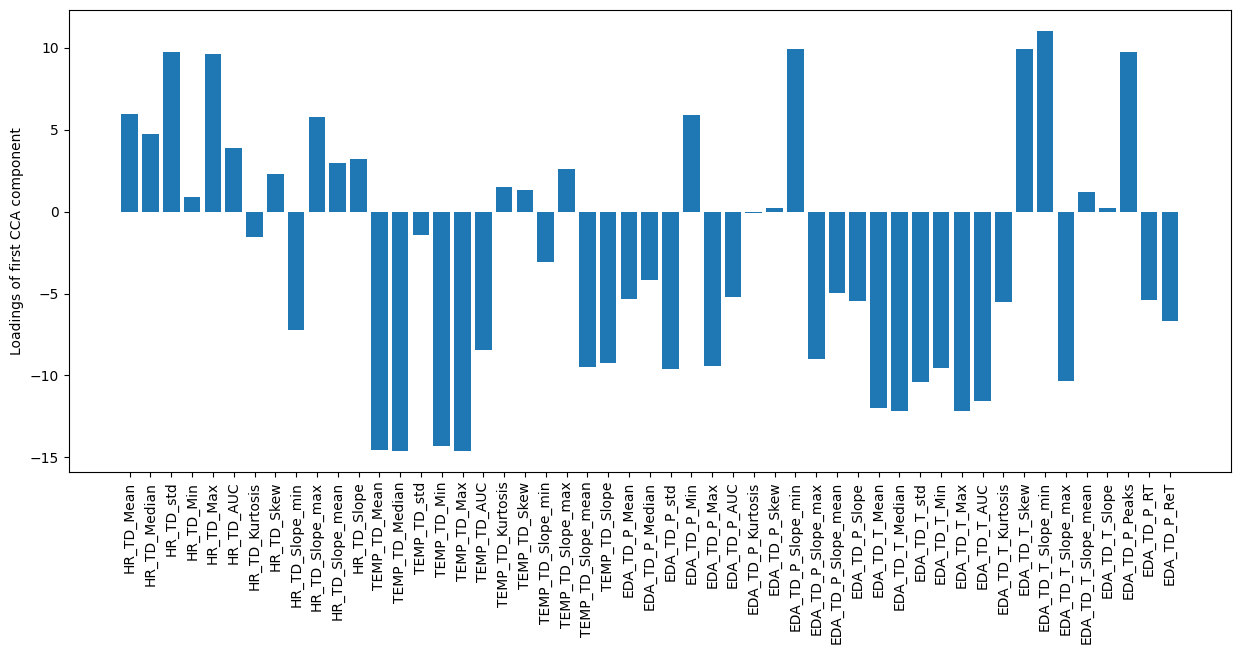

In [260]:
# try cannonical correlation analysis of the puzzlers biometrics and emotions
from sklearn.cross_decomposition import CCA

#normalize data and reponse
X_puzzler = (X_puzzler - X_puzzler.mean()) / X_puzzler.std()
y_puzzler = (y_puzzler - y_puzzler.mean()) / y_puzzler.std()

cca = CCA(n_components=len(emotions), scale=False)
cca.fit(X_puzzler, y_puzzler.drop(columns=['Pos_emotions', 'Neg_emotions']))

X_puzzler_cca, y_puzzler_cca = cca.transform(X_puzzler, y_puzzler.drop(columns=['Pos_emotions', 'Neg_emotions']))

x_loadings_puzzler = cca.x_loadings_
y_loadings_puzzler = cca.y_loadings_

comp_corr = [np.corrcoef(X_puzzler_cca[:, i], y_puzzler_cca[:, i])[1][0] for i in range(len(emotions))]
#plt.bar(['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'CC8', 'CC9', 'CC10', 'CC11'], comp_corr)

#Plot scatter plot of the first two components
fig, ax = plt.subplots(2,2, figsize=(10,10))

for i in range(4):
    ax[i//2, i%2].scatter(X_puzzler_cca[:, i], y_puzzler_cca[:, i])
    ax[i//2, i%2].set_xlabel('Biometrics CCA component {}'.format(i+1))
    ax[i//2, i%2].set_ylabel('Emotions CCA component {}'.format(i+1))

coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = biometrics)
coef_df.index = emotions

#plot the coefficients as heatmap
plt.figure(figsize=(15, 6))
plt.imshow(coef_df, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(0,51), coef_df.columns, rotation=90)
plt.yticks(range(0,11), coef_df.index)
plt.show()

#plot the loadings of first component
plt.figure(figsize=(15, 6))
plt.bar(range(0,51), x_loadings_puzzler[:, 0])
plt.xticks(range(0,51), biometrics, rotation=90)
plt.ylabel('Loadings of first CCA component')
plt.show()



In [230]:
X_non_puzzler = (X_non_puzzler - X_non_puzzler.mean()) / X_non_puzzler.std()
y_non_puzzler = (y_non_puzzler - y_non_puzzler.mean()) / y_non_puzzler.std()

cca = CCA(n_components=len(emotions), scale=False)
cca.fit(X_non_puzzler, y_non_puzzler.drop(columns=['Pos_emotions', 'Neg_emotions']))

X_non_puzzler_cca, y_non_puzzler_cca = cca.transform(X_non_puzzler, y_non_puzzler.drop(columns=['Pos_emotions', 'Neg_emotions']))

x_loadings_non_puzzler = cca.x_loadings_
y_loadings_non_puzzler = cca.y_loadings_



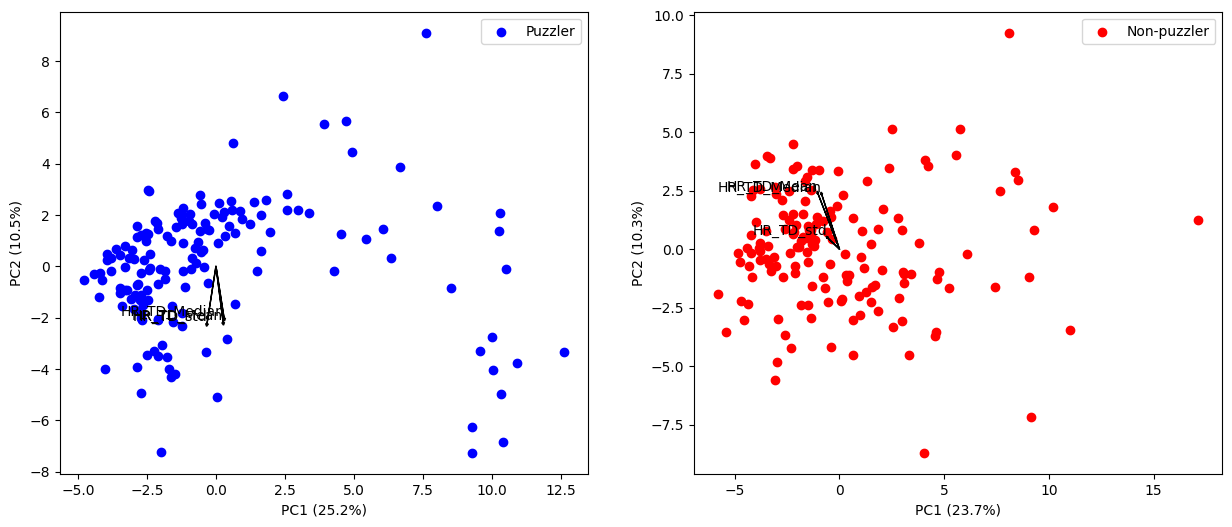

In [207]:
#pca
from sklearn.decomposition import PCA

#normalize data
puzzler_pca = (puzzler.drop(columns=categories) - puzzler.drop(columns=categories).mean()) / puzzler.drop(columns=categories).std()
non_puzzler_pca = (non_puzzler.drop(columns=categories) - non_puzzler.drop(columns=categories).mean()) / non_puzzler.drop(columns=categories).std()

pca_p = PCA(n_components=2)
pca_np = PCA(n_components=2)
puzzler_pca = pca_p.fit_transform(puzzler_pca)
non_puzzler_pca = pca_np.fit_transform(non_puzzler_pca)

fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].scatter(puzzler_pca[:,0], puzzler_pca[:,1], c='b', label='Puzzler')
ax[0].legend()

ax[1].scatter(non_puzzler_pca[:,0], non_puzzler_pca[:,1], c='r', label='Non-puzzler')
ax[1].legend()

# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
scores_p = puzzler_pca[:, :2] # coordinates of samples (i.e., scores; let's take the first two axes)
loadings_p = pca_p.components_[:2].T # coordinates of features (i.e., loadings; note the transpose)
pvars_p = pca_p.explained_variance_ratio_[:2] * 100 # proportions of variance explained by axes
arrows_p = loadings_p * np.abs(scores_p).max(axis=0)

# features as arrows
num_arrows = 3
for i, arrow in enumerate(arrows_p[:num_arrows,:]):
    ax[0].arrow(0, 0, arrow[0], arrow[1], head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=3)
    ax[0].text(arrow[0], arrow[1], puzzler.drop(columns=categories).columns[i], ha='right', va='bottom', fontsize=10, color='black')

# axis labels
ax[0].set_xlabel(f'PC{1} ({pvars_p[0]:.1f}%)')
ax[0].set_ylabel(f'PC{2} ({pvars_p[1]:.1f}%)')

scores_np = non_puzzler_pca[:, :2] # coordinates of samples (i.e., scores; let's take the first two axes)
loadings_np = pca_np.components_[:2].T # coordinates of features (i.e., loadings; note the transpose)
pvars_np = pca_np.explained_variance_ratio_[:2] * 100 # proportions of variance explained by axes
arrows_np = loadings_np * np.abs(scores_np).max(axis=0)

# features as arrows
for i, arrow in enumerate(arrows_np[:num_arrows,:]):
    ax[1].arrow(0, 0, arrow[0], arrow[1], head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=3)
    ax[1].text(arrow[0], arrow[1], non_puzzler.drop(columns=categories).columns[i], ha='right', va='bottom', fontsize=10, color='black')

# axis labels
ax[1].set_xlabel(f'PC{1} ({pvars_np[0]:.1f}%)')
ax[1].set_ylabel(f'PC{2} ({pvars_np[1]:.1f}%)')

plt.show()


# Try PCA of only emotions


#### Det virker til at det er de vrede følelser der driver variansen i spørgeskemaerne

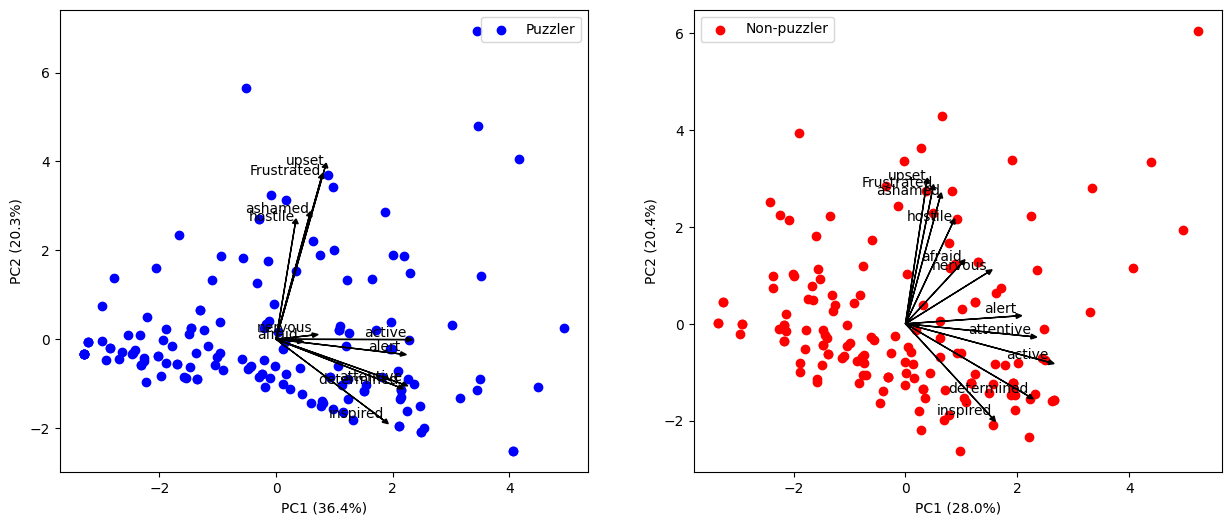

In [208]:
#pca of only emotions still divided into puzzlers and non-puzzlers

puzzler_emotions = (puzzler[emotions] - puzzler[emotions].mean()) / puzzler[emotions].std()
non_puzzler_emotions = (non_puzzler[emotions] - non_puzzler[emotions].mean()) / non_puzzler[emotions].std()

pca_p = PCA(n_components=2)
pca_np = PCA(n_components=2)
puzzler_emotions_pca = pca_p.fit_transform(puzzler_emotions)
non_puzzler_emotions_pca = pca_np.fit_transform(non_puzzler_emotions)

fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].scatter(puzzler_emotions_pca[:,0], puzzler_emotions_pca[:,1], c='b', label='Puzzler')
ax[0].legend()

ax[1].scatter(non_puzzler_emotions_pca[:,0], non_puzzler_emotions_pca[:,1], c='r', label='Non-puzzler')
ax[1].legend()

# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
scores_p = puzzler_emotions_pca[:, :2] # coordinates of samples (i.e., scores; let's take the first two axes)
loadings_p = pca_p.components_[:2].T # coordinates of features (i.e., loadings; note the transpose)
pvars_p = pca_p.explained_variance_ratio_[:2] * 100 # proportions of variance explained by axes
arrows_p = loadings_p * np.abs(scores_p).max(axis=0)

# features as arrows
num_arrows = 11
for i, arrow in enumerate(arrows_p[:num_arrows,:]):
    ax[0].arrow(0, 0, arrow[0], arrow[1], head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=3)
    ax[0].text(arrow[0], arrow[1], emotions[i], ha='right', va='bottom', fontsize=10, color='black')

# axis labels
ax[0].set_xlabel(f'PC{1} ({pvars_p[0]:.1f}%)')
ax[0].set_ylabel(f'PC{2} ({pvars_p[1]:.1f}%)')

scores_np = non_puzzler_emotions_pca[:, :2] # coordinates of samples (i.e., scores; let's take the first two axes)
loadings_np = pca_np.components_[:2].T # coordinates of features (i.e., loadings; note the transpose)
pvars_np = pca_np.explained_variance_ratio_[:2] * 100 # proportions of variance explained by axes
arrows_np = loadings_np * np.abs(scores_np).max(axis=0)

# features as arrows
for i, arrow in enumerate(arrows_np[:num_arrows,:]):
    ax[1].arrow(0, 0, arrow[0], arrow[1], head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=3)
    ax[1].text(arrow[0], arrow[1], emotions[i], ha='right', va='bottom', fontsize=10, color='black')

# axis labels
ax[1].set_xlabel(f'PC{1} ({pvars_np[0]:.1f}%)')
ax[1].set_ylabel(f'PC{2} ({pvars_np[1]:.1f}%)')

plt.show()

# PCA of emotions on full dataset

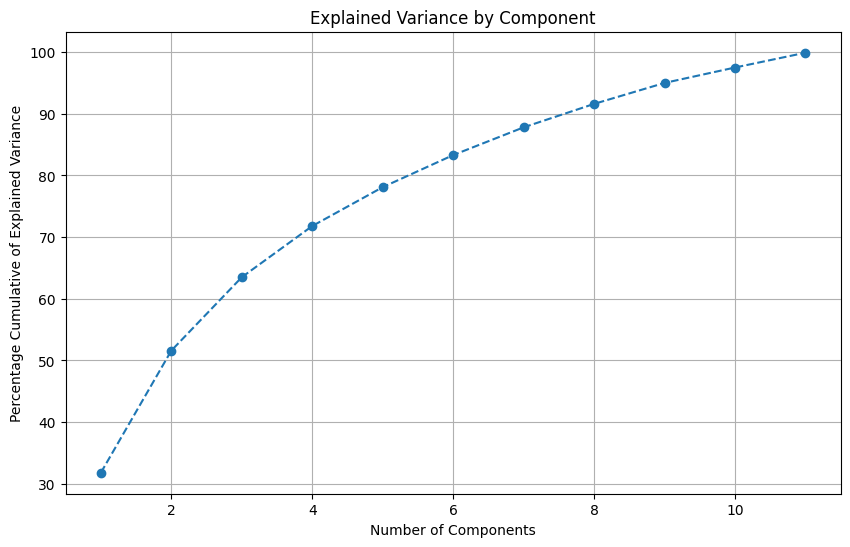

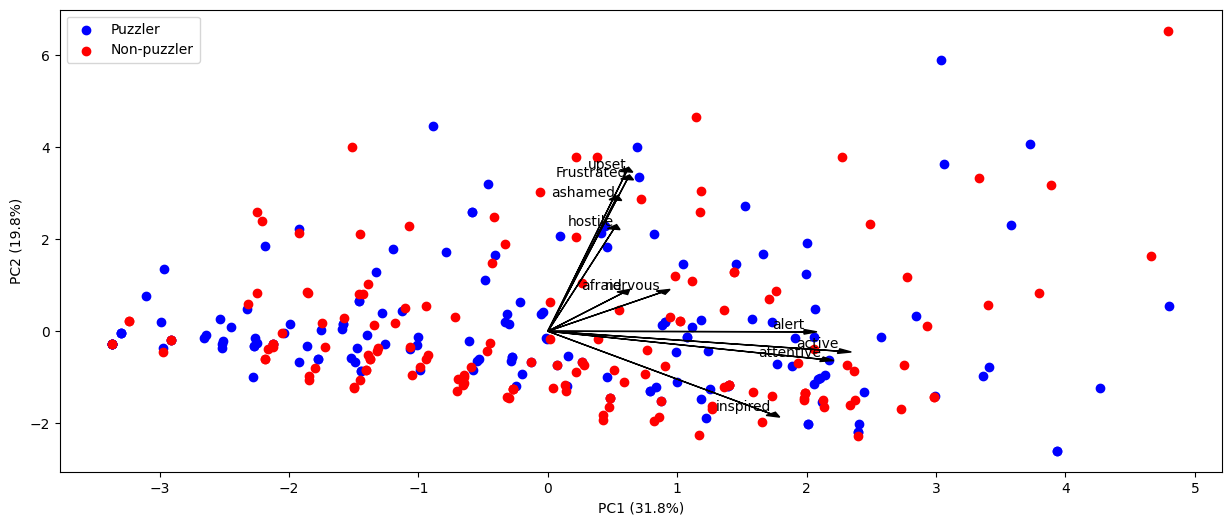

In [216]:
#pca of only emotions on the whole dataset

emotions_data = (data[emotions] - data[emotions].mean()) / data[emotions].std()
puzzler_idx = data['Puzzler'] == 1
non_puzzler_idx = data['Puzzler'] == 0

pca = PCA(n_components=11)
emotions_pca = pca.fit_transform(emotions_data)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

fig, ax = plt.subplots(1,1, figsize=(15, 6))

ax.scatter(emotions_pca[puzzler_idx,0], emotions_pca[puzzler_idx,1], c='b', label='Puzzler')
ax.scatter(emotions_pca[non_puzzler_idx,0], emotions_pca[non_puzzler_idx,1], c='r', label='Non-puzzler')
ax.legend()

# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
scores = emotions_pca[:, :2] # coordinates of samples (i.e., scores; let's take the first two axes)
loadings = pca.components_[:2].T # coordinates of features (i.e., loadings; note the transpose)
pvars = pca.explained_variance_ratio_[:2] * 100 # proportions of variance explained by axes
arrows = loadings * np.abs(scores).max(axis=0)

# features as arrows
num_arrows = 10

for i, arrow in enumerate(arrows[:num_arrows,:]):
    ax.arrow(0, 0, arrow[0], arrow[1], head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=3)
    ax.text(arrow[0], arrow[1], emotions[i], ha='right', va='bottom', fontsize=10, color='black')

# axis labels
ax.set_xlabel(f'PC{1} ({pvars[0]:.1f}%)')
ax.set_ylabel(f'PC{2} ({pvars[1]:.1f}%)')

plt.show()


# Try PCA on the biometrics

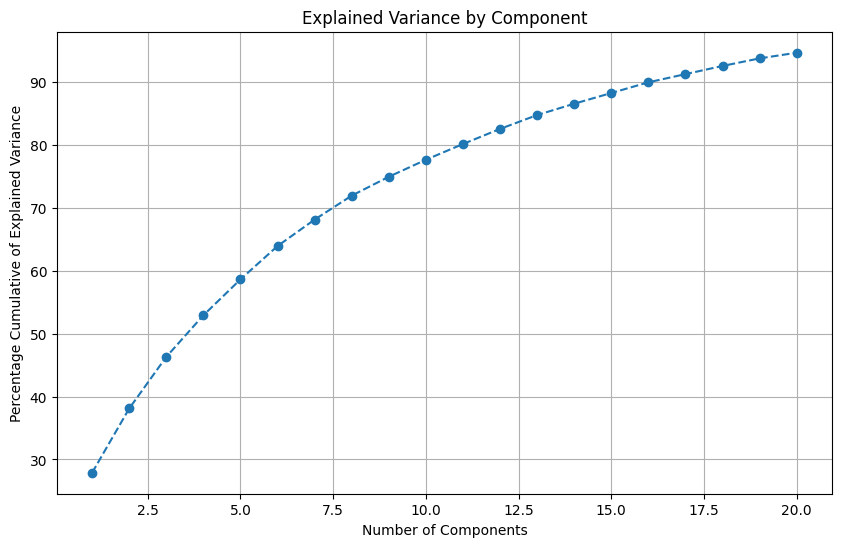

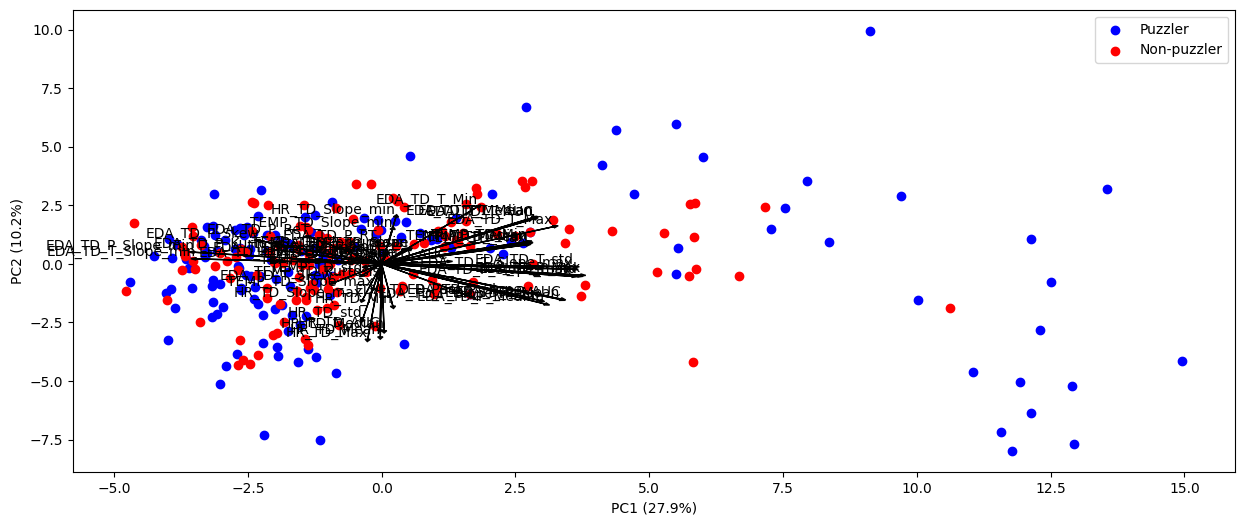

In [223]:
#pca of only biometrics on the whole dataset using thresholding when plotting the loadings

biometrics_data = (data[biometrics] - data[biometrics].mean()) / data[biometrics].std()
puzzler_idx = data['Puzzler'] == 1
non_puzzler_idx = data['Puzzler'] == 0

pca = PCA(n_components=20)
biometrics_pca = pca.fit_transform(biometrics_data)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

fig, ax = plt.subplots(1,1, figsize=(15, 6))

ax.scatter(biometrics_pca[puzzler_idx,0], biometrics_pca[puzzler_idx,1], c='b', label='Puzzler')
ax.scatter(biometrics_pca[non_puzzler_idx,0], biometrics_pca[non_puzzler_idx,1], c='r', label='Non-puzzler')
ax.legend()

# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
scores = biometrics_pca[:, :2] # coordinates of samples (i.e., scores; let's take the first two axes)
loadings = pca.components_[:2].T # coordinates of features (i.e., loadings; note the transpose)
pvars = pca.explained_variance_ratio_[:2] * 100 # proportions of variance explained by axes
arrows = loadings * np.abs(scores).max(axis=0)

# features as arrows
num_arrows = 51

for i, arrow in enumerate(arrows[:num_arrows,:]):
    ax.arrow(0, 0, arrow[0], arrow[1], head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=3)
    ax.text(arrow[0], arrow[1], biometrics[i], ha='right', va='bottom', fontsize=10, color='black')

# axis labels
ax.set_xlabel(f'PC{1} ({pvars[0]:.1f}%)')
ax.set_ylabel(f'PC{2} ({pvars[1]:.1f}%)')

plt.show()


